# Prediction using Supervised ML


# Linear Regression with Python Scikit Learn
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

Simple Linear Regression
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

#### Author: Puneeth Kumar T P

Task :Predict the percentage of an student based on the no. of study hours.

In [61]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [62]:
# Reading data from remote link
url = "http://bit.ly/w-data"
df= pd.read_csv(url)
print("Data imported successfully")

Data imported successfully


In [63]:
#getting top 5 records
df.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [64]:
#Handling the null values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [66]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


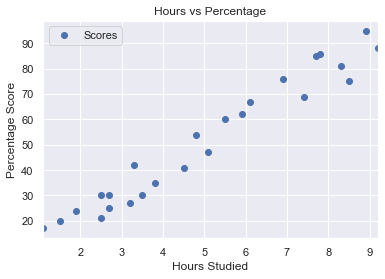

In [67]:
# Plotting the distribution of scores
s_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

##### From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

In [68]:
#preparing the data for training the model
X=df['Hours'].values
Y=df['Scores'].values

In [69]:
print(X.shape)
print(Y.shape)

(25,)
(25,)


### Preparing the data
The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [70]:
X = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values  

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [71]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

# Performing the Linear Regression

In [72]:
# import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lr(Creating LinearRegression Object)
model = LinearRegression()

# Fit the model using model.fit()
model.fit(X_train, y_train)

print("Training is successfully done")

Training is successfully done



# Coefficients Calculation

In [73]:
# Print the intercept and coefficients
print(model.intercept_)
print(model.coef_)

2.018160041434683
[9.91065648]


y=mx+c
y=9.91065 X Hours +2.0181
Now, let's use this equation to predict our scores.

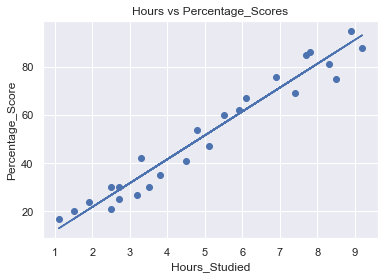

In [74]:
# Plotting the regression line
line = model.coef_*X+model.intercept_

# Plotting for the test data
plt.scatter(X,Y)
plt.plot(X, line);
plt.title('Hours vs Percentage_Scores')  
plt.xlabel('Hours_Studied')  
plt.ylabel('Percentage_Score')
plt.show()

# Making Prediction

In [75]:
# Making predictions on the testing set
y_pred = model.predict(X_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [76]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [77]:
# we can also test with your own data
hours =np.array([9.25])
hours=hours[:, np.newaxis]
New_pred = model.predict(hours)
print("No of Hours = {}".format(9.25))
print("Predicted Score = {}".format(New_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


If student studied 9.25 hours student can score 93.69 % .

# Computing RMSE and R^2 Values

Text(0, 0.5, 'Percentage_Score')

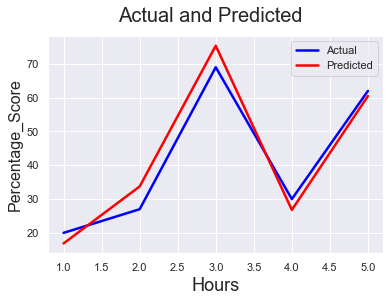

In [78]:
# Actual vs Predicted
import matplotlib.pyplot as plt
import seaborn as sns
c = [i for i in range(1,6,1)]         # generating index 
sns.set()
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-",label='Actual')
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-",label='Predicted')
plt.legend()
fig.suptitle('Actual and Predicted', fontsize=20)  # Plot heading 
plt.xlabel('Hours', fontsize=18)                   # X-label
plt.ylabel('Percentage_Score', fontsize=16)       # Y-label

# Evaluating the model
The final step is to evaluate the performance of algorithm.
This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [79]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

In [80]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 21.5987693072174
r_square_value : 0.9454906892105356


In [81]:
print('Mean Absolute Error:',mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002975


The model performing good the r_square is 94%